# Problema 5 (tema 4)

Aproximar la solución del problema de Cauchy

$$
y'=x^2 - \sqrt{y-e^{x/2}}, \quad x\in[0,2], \quad
y(0)=5,
$$
con paso $h=0.1$, mediante:
1. El método de Adams--Bashforth de orden dos.
$$
y_{n+2}=y_{n+1} + \frac{h}{2} \big[3f(t_{n+1},y_{n+1}) - f(t_{n},y_{n}) \big].
$$
2. El método predictor-corrector $AB2$--$AM2$, que se construye utilizando el método anterior para la predicción y, para la corrección, el método de Adams-Moulton de orden 2:
$$
y_{n+2}= y_{n+1} + \frac{h}{12} \big[5f(t_{n+2},y_{n+2}) + 8 f(t_{n+1},y_{n+1}) - f(t_{n},y_{n}) \big].
$$
Inicializar mediante un método de un paso adecuado.

In [2]:
%pylab inline

def f(t, y): return t**2 - sqrt(y-exp(t/2))
a, b = 0, 2
h = 0.1
y_a = 5

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


### 1. Método de Adams-Basforth de dos pasos
Como $AB2$ tiene orden dos, inicializamos mediante un método de orden dos, por ejemplo Euler-Cauchy:

In [3]:
def AB2(f, y_a, a, b, h):
    """Calcula la solución de y'=f(t,y) mediante el mét. AB2."""
    N = int( round((b-a)/h) )
    soporte = linspace(a, b, N+1)
    
    # (1) Inicialización, por ejemplo Euler-Cauchy
    sol = [y_a] # Almacenamos y_0
    yn = y_a
    for i in range(1): # Sólo daremos un paso en E-Cauchy, calculando y_1
        tn = soporte[i]
        k1 = yn + h/2 * f(tn, yn)
        yn = yn + h*f(tn + h/2, k1) # E-Cauchy
        sol.append(yn)
        
    # (2) Iteraciones del método predictor-corrector AB2-AM2
    y0 = sol[0]; y1 = sol[1];
    f0 = f(a, y0); f1 = f(a+h, y1);
    for i in range(N-1): # i = 0, 1, ..., N-2
        # a) Cálculo de $y_{n+2}$
        yn = yn + h/2 * (3*f1 - f0)
        sol.append(yn)
        # b) Preparamos la siguiente iteración
        tn = soporte[i+2] # Ponemos el tiempo en $t_{n+2}$
        f0 = f1; f1 = f(tn, yn) # Calculamos f en $t_{n+2}$
    return soporte, sol

soporte, sol_ab2 = AB2(f, y_a, a, b, h)

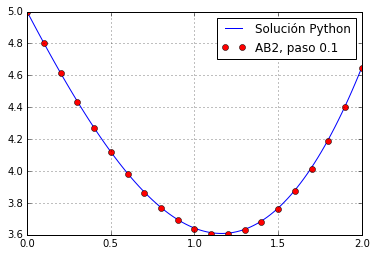

In [4]:
xx = linspace(a,b,100)
from scipy.integrate import odeint
def func(y, t): return f(t,y)
sol_python = odeint(func, y_a, xx)
plot(xx, sol_python, label=u'Solución Python')

plot(soporte, sol_ab2, 'o', c='red',  label='AB2, paso ' + str(h))
legend(loc='best')
grid()

### 2.- Método predictor-corrector AB2-AM2

El código del método predictor-corrector es exactamente igual al anterior, excepto por el siguiente detalle: en cada etapa, después de un primer cálculo de $y_{n+2}$ (predicción), debemos utilizar este valor como semilla para hallar $f(t_{n+2}, y_{n+2})$, valor que será usado (por el método de Adams-Moulton de orden 2) para calcular una corrección de $y_{n+2}$, que será la aproximación definitiva de $y'(t_{n+2})$.

In [5]:
def pred_corr_AB2_AM2(f, y_a, a, b, h):
    """Calcula la solución de y'=f(t,y) mediante el mét. AB2."""
    N = int( round((b-a)/h) )
    soporte = linspace(a, b, N+1)
    
    # (1) Inicialización, por ejemplo Euler-Cauchy
    sol = [y_a] # Almacenamos y_0
    yn = y_a
    for i in range(1): # Sólo daremos un paso en E-Cauchy, calculando y_1
        tn = soporte[i]
        k1 = yn + h/2 * f(tn, yn)
        yn = yn + h*f(tn + h/2, k1) # E-Cauchy
        sol.append(yn)
        
    # (2) Iteraciones del método predictor-corrector
    y0 = sol[0]; y1 = sol[1];
    f0 = f(a, y0); f1 = f(a+h, y1);
    for i in range(N-1): # i = 0, 1, ..., N-2
        # a) Predicción de $y_{n+2}$
        yn_pred = yn + h/2 * (3*f1 - f0)
        # b) Corrección de $y_{n+2}$
        tn = soporte[i+2] # Ponemos el tiempo en $t_{n+2}$
        fn = f(tn, yn_pred) # Cálculo de $f(t_{n+2}, y^*_{n+2})$
        yn = yn + h/12 * (5*fn + 8*f1 -f0) # Corrección de $y_{n+2}$
        sol.append(yn)
        f0 = f1; f1 = f(tn, yn) # Calculamos f en $t_{n+2}$
    return soporte, sol

soporte, sol_pred_corr = pred_corr_AB2_AM2(f, y_a, a, b, h)

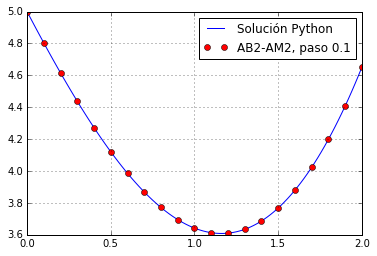

In [6]:
xx = linspace(a,b,100)
from scipy.integrate import odeint
def func(y, t): return f(t,y)
sol_python = odeint(func, y_a, xx)
plot(xx, sol_python, label=u'Solución Python')

plot(soporte, sol_pred_corr, 'o', c='red',  label='AB2-AM2, paso ' + str(h))
legend(loc='best')
grid()